In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
# Load dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape to add channel dimension (28, 28, 1)
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#all the categories of the dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


 Why Use Conv2D in a CNN?


In image classification (like with Fashion-MNIST), our goal is to **understand what's in the image** — for example, is this a sneaker, a t-shirt, or a bag?

But raw pixel data is **too "dumb"** for a model to understand directly.

We need a way to **extract meaningful patterns** from the image — like:

* **Edges**
* **Corners**
* **Textures**
* **Shapes**


Each Conv2D layer:

* Looks at **small patches** of the image (say, 3x3),
* Detects **low-level patterns** (edges, lines, etc.),
* Passes those **feature maps** to the next layer.

As we go deeper:

* **Higher layers** detect **more abstract features** like shirt sleeves, shoe shapes, etc.



If you flattened the image and used just Dense layers:

* You'd lose **spatial relationships** between pixels.
* The model wouldn't know that certain pixels form a line or a pattern.
* It would perform worse and need **far more data** and **computational power**.



Conv2D layers:

* Learn to **detect edges or patterns** in clothing (like laces, straps, collars).
* Help the model understand **what makes a sneaker look like a sneaker**, not a shirt.
* Do this **efficiently**, by **reusing filters** over the entire image.


| Benefit           | Why It Matters                                         |
| ----------------- | ------------------------------------------------------ |
| Pattern detection | Finds edges, textures, shapes in clothing images       |
| Spatial awareness | Keeps spatial layout of image intact                   |
| Fewer parameters  | Much more efficient than fully connected layers        |
| Generalization    | Learns features that work on many images, not just one |



In [ ]:
#training the model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)), #Used to extract spatial features like textures, edges, and patterns from clothing images.
    layers.MaxPooling2D(2, 2), #Reduces dimensionality while retaining the most significant features.

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'), #Introduces non-linearity and speeds up training.
    layers.Dense(10, activation='softmax') #Converts logits into probabilities for multi-class classification.

])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #loss function for integral labels
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 28ms/step - accuracy: 0.7764 - loss: 0.6196 - val_accuracy: 0.8711 - val_loss: 0.3540
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.8814 - loss: 0.3236 - val_accuracy: 0.8844 - val_loss: 0.3182
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9014 - loss: 0.2653 - val_accuracy: 0.8950 - val_loss: 0.2846
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9163 - loss: 0.2279 - val_accuracy: 0.9067 - val_loss: 0.2628
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9263 - loss: 0.2010 - val_accuracy: 0.8995 - val_loss: 0.2720
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9354 - loss: 0.1713 - val_accuracy: 0.9055 - val_loss: 0.2717
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9421 - loss: 0.1534 - val_accuracy: 0.9061 - val_loss: 0.2696
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9496 -

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_acc)


313/313 - 2s - 7ms/step - accuracy: 0.9044 - loss: 0.3082
Test accuracy: 0.9043999910354614


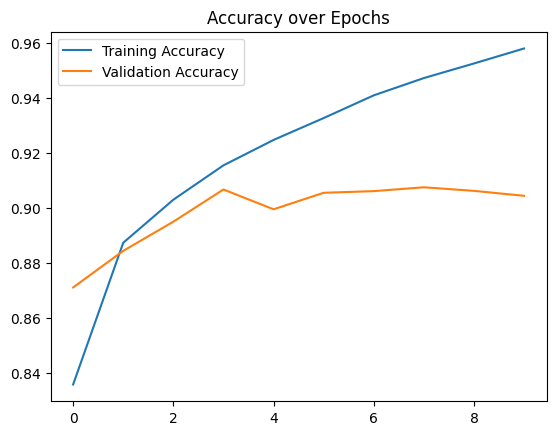

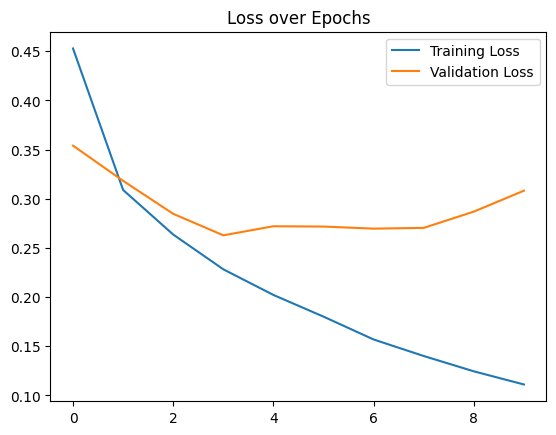

In [ ]:
#accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

#loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()
